In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import plot_tools
import marbl_diag

In [2]:
marbl_diag.clobber = True # set to true to recompute
category_spec = {
        'process_name' : 'tavgsurf',
        'processes' : [marbl_diag.toolbelt['tavgsurf']],
        'variables' : ['pCO2SURF','NPP:photoC_sp,photoC_diat,photoC_diaz'],
        'collection_name' : 'surface_prod',
        'stream' : 'monthly'}
ds = marbl_diag.open_transformed_hist_dataset(**category_spec)
ds

computing ann mean over 1 years


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/dask/core.py:306: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif type_arg is type(key) and arg == key:


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, transport_comp: 5, transport_reg: 2, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_w_bot               (z_w_bot) float64 1e+03 2e+03 3e+03 4e+03 5e+03 ...
  * z_w_top               (z_w_top) float64 0.0 1e+03 2e+03 3e+03 4e+03 ...
  * moc_z                 (moc_z) float64 0.0 1e+03 2e+03 3e+03 4e+03 5e+03 ...
  * lat_aux_grid          (lat_aux_grid) float64 -79.49 -78.95 -78.42 -77.88 ...
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    time_bound            (d2) float64 532.3 562.7
    pCO2SURF              (nlat, nlon) float64 nan nan nan nan nan nan nan ...
    NPP                   (nlat, nlon) float64 nan nan nan nan nan nan nan ...
    year                  float64 1.0
    moc_components        (moc_comp) |S384 'Eulerian Mean

110.948067047


2.2086199835e-09


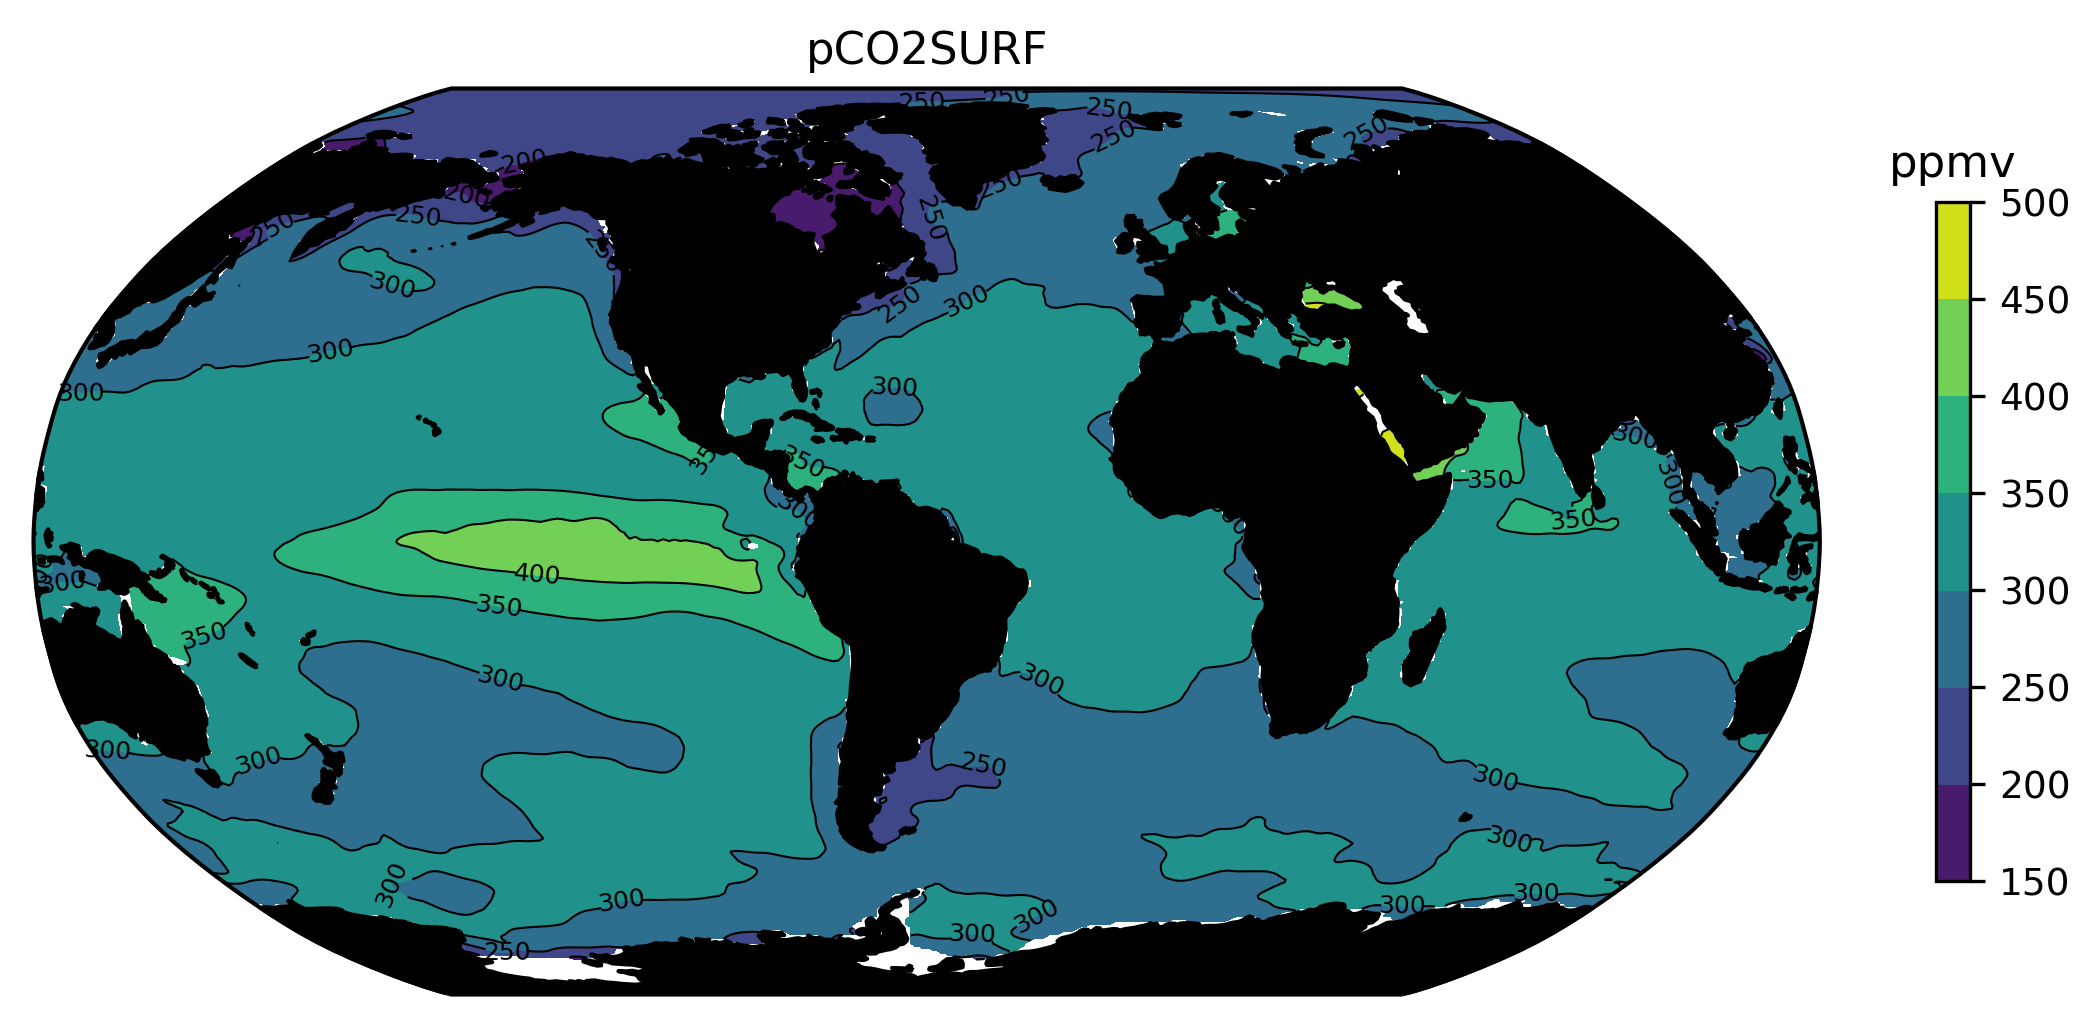

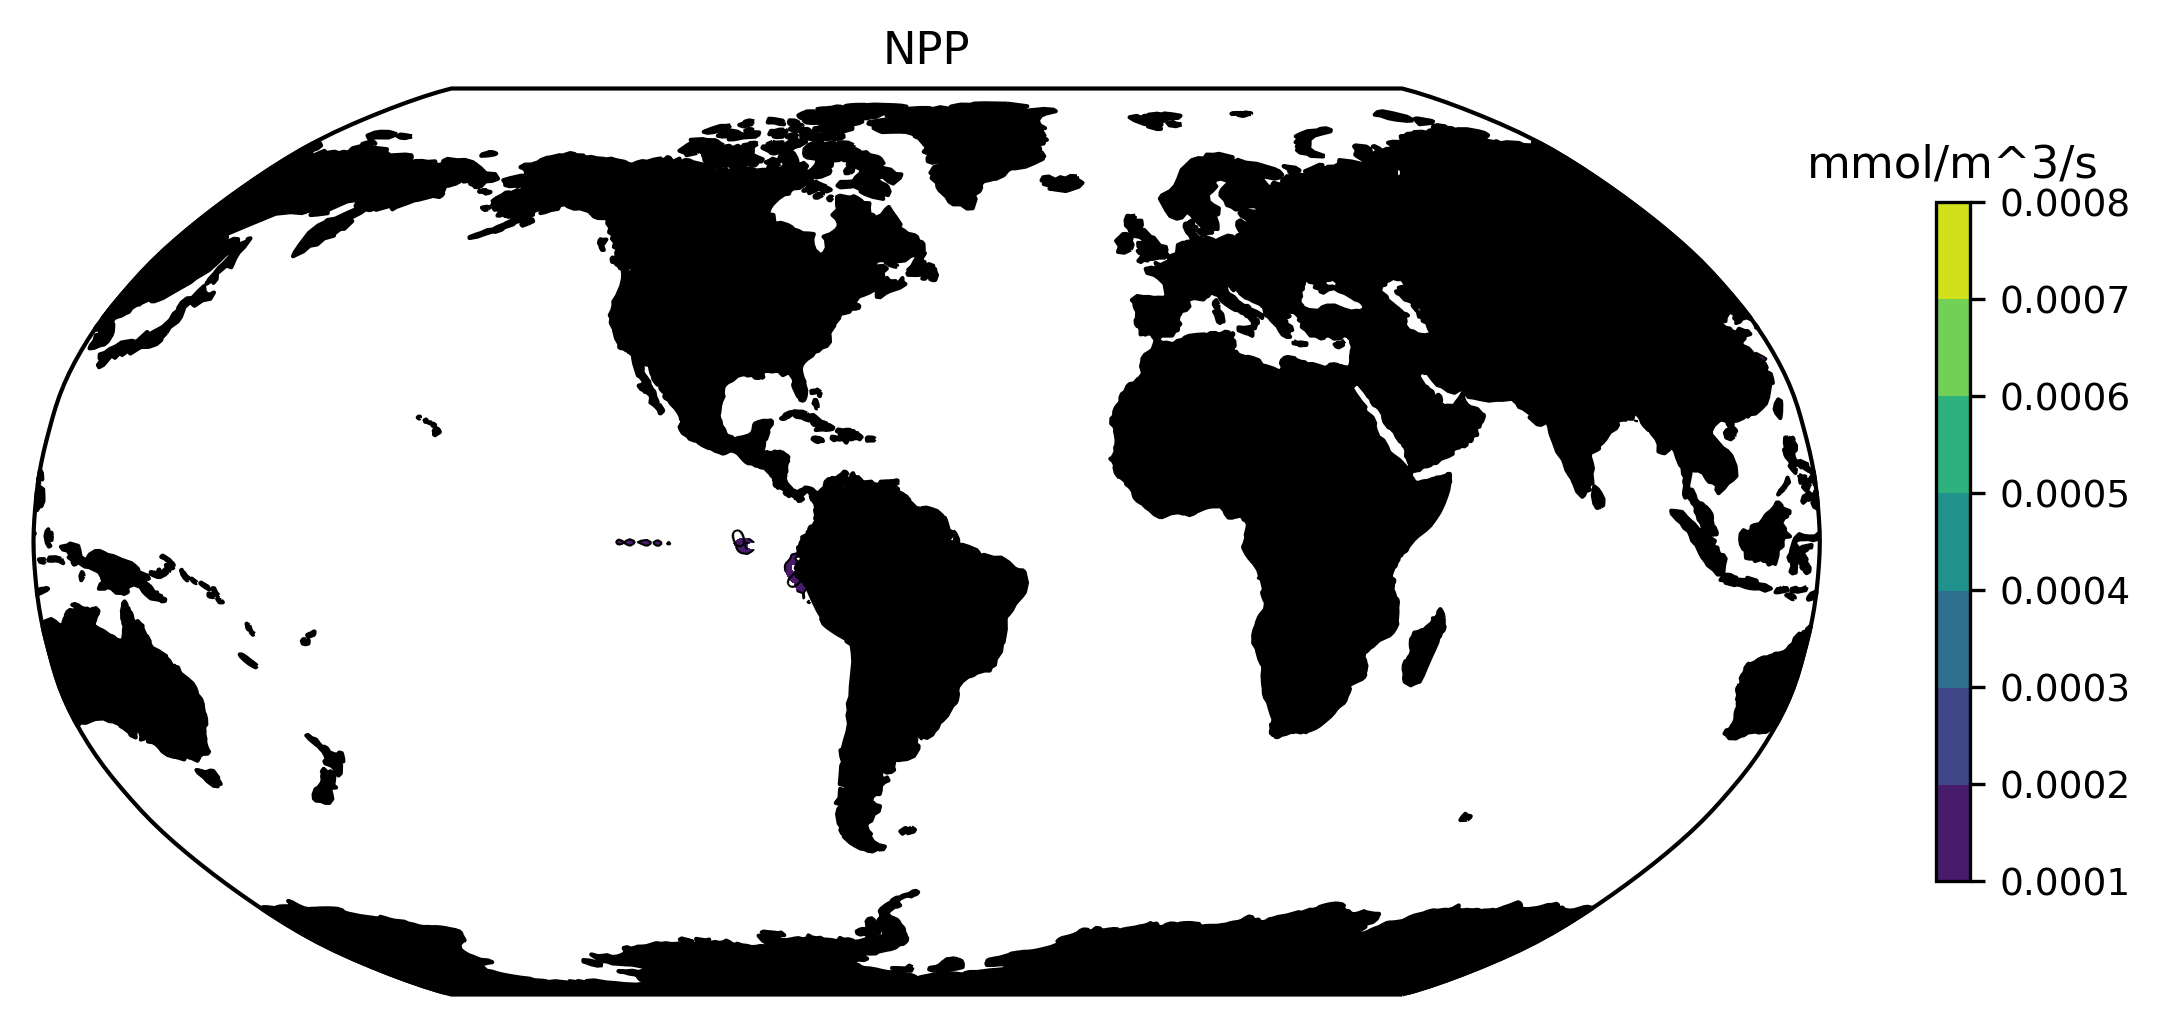

In [3]:
obj = {}
for v in category_spec['variables']:
    varname = v
    if ':' in v:
        varname = v.split(':')[0]
    units = ds[varname].attrs['units']
    lon = ds.TLONG.values
    lat = ds.TLAT.values
    field = ds[varname].values[:,:]
    lon,lat,field = plot_tools.adjust_pop_grid(lon,lat,field)
    print np.nanmin(field)
    contour_specs = {'levels':plot_tools.nice_levels(np.nanmin(field), 
                                          np.nanmax(field),10)} #,'cmap':cmocean.cm.balance}
    
    fig=plt.figure(figsize=(10, 4),dpi=300)
    gs = gridspec.GridSpec(1,1)
    obj[varname] = plot_tools.canvas_map_contour_overlay(lon,lat,field,
                                                    contour_specs,
                                                    units = units,
                                                    fig=fig,
                                                    gridspec=gs,
                                                    row=0,col=0)
    obj[varname]['ax'].set_title(varname)
    

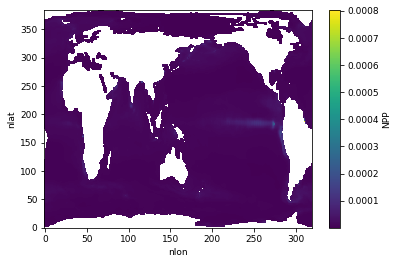

In [4]:
ds.NPP.plot()

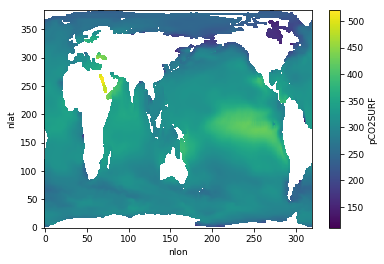

In [5]:
ds.pCO2SURF.plot()
